# Stepic Data Contest

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize' : (9, 6)})                              # Чтобы графики были побольше

In [4]:
events_data = pd.read_csv('event_data_train.csv')
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [5]:
events_data['action'].unique()
# viewed - открыл
# passed - решид
# discovered - увидел впервые
# started_attempt - начал решать

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

### Преобразуем данные так, чтобы можно было увидеть некоторый сюжет, что они отображают

In [6]:
# Преобразуем дату в более удобное представление
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')       # unit указывает, что данные в секундах !!!

In [7]:
events_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [8]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [9]:
# Создадим колонку только с днями
events_data['day'] = events_data['date'].dt.date

In [10]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<AxesSubplot:xlabel='day'>

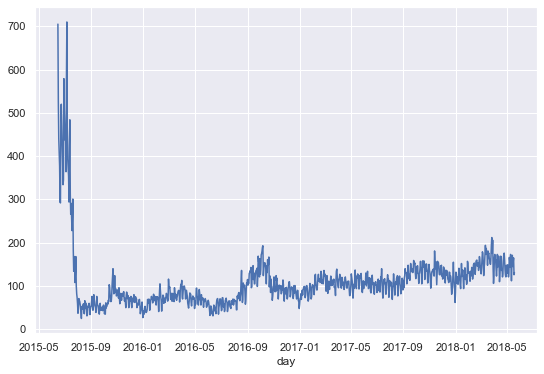

In [11]:
# Составим график активности студентов
events_data.groupby('day')['user_id'].nunique().plot()

In [12]:
# Посмотрим на успеваемость студентов (посчитаем количество пройденных степов)
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [13]:
# Если не хотим сложные индексы
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


<AxesSubplot:>

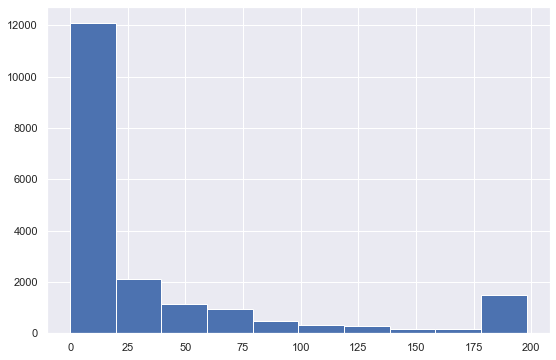

In [14]:
# Построим гистограмму
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()['discovered'].hist()

### Обратимся ко второй таблице

In [15]:
submissions_data= pd.read_csv('submissions_data_train.csv')
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [16]:
# Сделаем аналогичные махинации для даты в этой таблице
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')
submissions_data

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03
...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56


In [17]:
submissions_data['day'] = submissions_data['date'].dt.date
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [18]:
user_scores = submissions_data.pivot_table(index='user_id', 
                             columns='submission_status', 
                             values='step_id', 
                             aggfunc='count', 
                             fill_value=0).reset_index()
user_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


### Посмотрим, какие перерывы в днях были у пользователей, чтобы определить промежуток, через который люди уже не вернутся на курс

In [19]:
# Оставим только нужные данные (повторы уберем, так как нам важно, что человек зашел на курс хотя бы раз в этот день)
# subset - колонки, в которых мы хотим избавится от повторений
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230
...,...,...,...
3480298,364,2018-05-19,1526762223
3480329,22851,2018-05-19,1526762629
3480333,943,2018-05-19,1526762664
3480669,26659,2018-05-19,1526770439


In [20]:
# Полученный на прошлом шаге датафрейм сгруппировали по user_id и сохранили для каждого пользоватлея уникальные таймстемпы
# то есть уникальные дни, когда он был на курсе
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])  \
                                                       .groupby('user_id')['timestamp']             \
                                                       .apply(list)                                 \
                                                       .apply(np.diff).values   
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [21]:
# Переведем получившийся массив массивов в один массив (объединение по строкам)
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [22]:
# Разница в днях
gap_data = gap_data / (60 * 60 * 24)
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

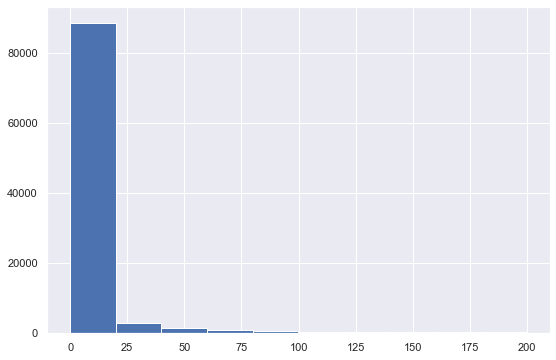

In [23]:
gap_data[gap_data < 200].hist()

In [24]:
gap_data.quantile(0.95)
# То есть только 5% пользователей возвращаются на курс после перевыва в 2 месяца(59 дней)

59.760440972222156

In [25]:
gap_data.quantile(0.90)
# И 10% пользователей возвращаются на курс после перевыва в 18 дней

18.325995370370403

**Возьмем среднее время в 30 дней.**

**Если пользователь не появляется на курсе 30 дней и более и при этом у него нет сертификата, то он курс бросил.**

In [26]:
# Определим для каждого пользователя время, когда он появлялся последний раз
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp' : 'max'})

In [27]:
users_data = users_data.rename(columns={'timestamp' : 'last_timestamp'})

In [28]:
users_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [29]:
# Определим какая дата у нас "сегодня"        -        1526772811 (2018-05-19 23:33:31)
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [30]:
now = 1526772811

In [31]:
# Количество секунд, которое равно 30 дням  (threshold - порог)
drop_out_threshold = 30 * 24 * 60 * 60

In [32]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [33]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


### Добавим данные о количестве правильных и неправильных сабмитов

In [34]:
user_scores                                                      # Соединим по столбцу user_id

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [35]:
users_data = users_data.merge(user_scores, on='user_id', how='outer')    # outer - чтобы было объединение, а не пересечение
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [36]:
users_data = users_data.fillna(0)
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [37]:
# Добавим еще информацию о самих событих
users_events_data = events_data.pivot_table(index='user_id', 
                                            columns='action', 
                                            values='step_id', 
                                            aggfunc='count', 
                                            fill_value=0).reset_index()
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [38]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')

In [39]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [40]:
# Добавим инфу сколько дней пользователь был на курсе
users_days = events_data.groupby('user_id')['day'].nunique()
users_days = users_days.to_frame().reset_index()
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [41]:
users_data = users_data.merge(users_days, on='user_id', how='outer')

In [42]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [43]:
# Проверим, что мы никого не потеряли
users_data['user_id'].nunique() == events_data['user_id'].nunique()

True

In [44]:
# Добавим колонку, успешно ли человек закончил курс 
# (правило ведем эмпирически - пусть человек закончил курс, если он набрал > 170 баллов)
users_data['passed_course'] = users_data['passed'] > 170

In [45]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [46]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [47]:
1425 / 17809 * 100 
# То есть 8% людей закончили курс

8.001572238755687

### Наша цель - как можно раньше предсказать, что пользователь уйдет с курса

Нужно определить количество дней, на которые мы будем смотреть

In [48]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [49]:
# Посмотрим, сколько в среднем пользователи тратят на полное прохождение курса
users_data[users_data.passed_course]['day'].median()

20.0

<AxesSubplot:>

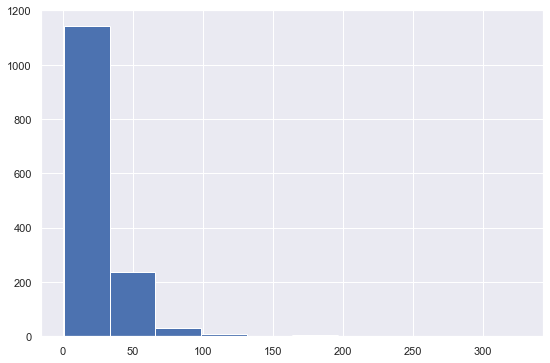

In [50]:
users_data[users_data.passed_course]['day'].hist()

**Возьмем для предсказаний промежуток в 3 дня**

In [51]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [58]:
# Отберем этот промежуток в 3 дня для каждого пользователя
user_min_data = events_data.groupby('user_id', as_index=False)                       \
                           .agg({'timestamp' : min})                                 \
                           .rename(columns = {'timestamp' : 'min_timestamp'})

In [59]:
user_min_data

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [61]:
users_data = users_data.merge(user_min_data, how='outer')

In [66]:
events_data['user_time'] = events_data['user_id'].map(str) + '_' + events_data['timestamp'].map(str)

In [67]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,11677_1526772685
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [69]:
learning_time_threshold = 3 * 24 * 60 * 60

In [70]:
user_learning_time_threshold = user_min_data['user_id'].map(str) + \
                               '_'                               + \
                               (user_min_data['min_timestamp']   + \
                               learning_time_threshold).map(str)

In [71]:
# Максимальное время, после которого мы уже не будем эти данные использовать
user_learning_time_threshold

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [72]:
user_min_data['user_learning_time_threshold'] = user_learning_time_threshold

In [75]:
events_data = events_data.merge(user_min_data[['user_id', 'user_learning_time_threshold']], how='outer')

In [76]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


In [77]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [78]:
events_data_train

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


**-------------------------------------------------------------------------------------------------------------------**

### Домашнее задание

In [152]:
# Для каждого пользователя найдите такой шаг, 
# который он не смог решить, и после этого не пытался решать другие шаги. 
# Затем найдите id шага,  который стал финальной точкой практического обучения на курсе 
# для максимального числа пользователей.

hmw_data = pd.read_csv('submissions_data_train.csv')
hmw_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [153]:
hmw_data['is_step_not_passeed'] = (hmw_data.submission_status == 'wrong')

In [154]:
hmw_data

,step_id,timestamp,submission_status,user_id,is_step_not_passeed
0,31971,1434349275,correct,15853,False
1,31972,1434348300,correct,15853,False
2,31972,1478852149,wrong,15853,True
3,31972,1478852164,correct,15853,False
4,31976,1434348123,wrong,15853,True
...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,True
509100,120745,1503059927,correct,13177,False
509101,120745,1506348153,wrong,15253,True
509102,120745,1523035316,wrong,1424,True


In [155]:
hmw_data = hmw_data[hmw_data.is_step_not_passeed]

In [156]:
hmw_data

,step_id,timestamp,submission_status,user_id,is_step_not_passeed
2,31972,1478852149,wrong,15853,True
4,31976,1434348123,wrong,15853,True
15,32031,1434363465,wrong,15853,True
33,32795,1434520465,wrong,15853,True
38,32812,1434346160,wrong,15853,True
...,...,...,...,...,...
509096,120745,1500154509,wrong,3310,True
509099,120745,1501946959,wrong,2615,True
509101,120745,1506348153,wrong,15253,True
509102,120745,1523035316,wrong,1424,True


In [144]:
temp_data = hmw_data.groupby('user_id', as_index=False)                       \
                    .agg({'timestamp' : 'max'})                               \
                    .rename(columns = {'timestamp' : 'last_step_time'})

In [145]:
temp_data

,user_id,last_step_time
0,3,1444568755
1,5,1499859715
2,8,1480604128
3,14,1436368601
4,16,1513104380
...,...,...
7760,26781,1495730219
7761,26784,1490590975
7762,26786,1469181660
7763,26794,1495528817


In [146]:
hmw_data = hmw_data.merge(temp_data, how='outer')

In [147]:
hmw_data

,step_id,timestamp,submission_status,user_id,is_step_not_passeed,last_step_time
0,31972,1478852149,wrong,15853,True,1479734102
1,31976,1434348123,wrong,15853,True,1479734102
2,32031,1434363465,wrong,15853,True,1479734102
3,32795,1434520465,wrong,15853,True,1479734102
4,32812,1434346160,wrong,15853,True,1479734102
...,...,...,...,...,...,...
286394,120745,1500154509,wrong,3310,True,1500154509
286395,120745,1501946959,wrong,2615,True,1501946959
286396,120745,1506348153,wrong,15253,True,1506348153
286397,120745,1523035316,wrong,1424,True,1523035316


In [148]:
hmw_data = hmw_data[hmw_data.timestamp == hmw_data.last_step_time]

In [149]:
hmw_data

,step_id,timestamp,submission_status,user_id,is_step_not_passeed,last_step_time
8,33025,1479734102,wrong,15853,True,1479734102
44,32795,1436206485,wrong,6640,True,1436206485
100,33734,1436273469,wrong,8624,True,1436273469
377,33685,1435854430,wrong,24821,True,1435854430
464,33669,1436772595,wrong,16503,True,1436772595
...,...,...,...,...,...,...
286394,120745,1500154509,wrong,3310,True,1500154509
286395,120745,1501946959,wrong,2615,True,1501946959
286396,120745,1506348153,wrong,15253,True,1506348153
286397,120745,1523035316,wrong,1424,True,1523035316


In [157]:
temp_data = hmw_data.groupby('user_id', as_index=False)                       \
                    .agg({'step_id' : 'max'})                                 \
                    .rename(columns = {'step_id' : 'last_step_id'})

In [158]:
hmw_data = hmw_data.merge(temp_data, how='outer')
hmw_data

,step_id,timestamp,submission_status,user_id,is_step_not_passeed,last_step_id
0,31972,1478852149,wrong,15853,True,33983
1,31976,1434348123,wrong,15853,True,33983
2,32031,1434363465,wrong,15853,True,33983
3,32795,1434520465,wrong,15853,True,33983
4,32812,1434346160,wrong,15853,True,33983
...,...,...,...,...,...,...
286394,120745,1500154509,wrong,3310,True,120745
286395,120745,1501946959,wrong,2615,True,120745
286396,120745,1506348153,wrong,15253,True,120745
286397,120745,1523035316,wrong,1424,True,120745


In [159]:
temp_data = hmw_data.groupby('step_id', as_index=False).count()

In [160]:
temp_data.sort_values('user_id')

,step_id,timestamp,submission_status,user_id,is_step_not_passeed,last_step_id
29,32929,85,85,85,85,85
16,32175,342,342,342,342,342
36,33362,673,673,673,673,673
59,33681,703,703,703,703,703
45,33482,707,707,707,707,707
...,...,...,...,...,...,...
12,32075,10003,10003,10003,10003,10003
44,33481,10300,10300,10300,10300,10300
19,32202,13002,13002,13002,13002,13002
11,32031,13373,13373,13373,13373,13373


**------------------------------------------------------------------------------------------------------------------------**

In [163]:
# Убедимся, что мы ничего не сломали
events_data_train.groupby('user_id').day.nunique().max()

4

In [165]:
# Сделаем тоже самое со вторым датафреймом

submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_data[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [166]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1434605177
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1434605177
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1434605177
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,15853_1434348188,15853_1434605177
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,15853_1434347371,15853_1434605177
...,...,...,...,...,...,...,...,...
509099,120745.0,1.501947e+09,wrong,2615,2017-08-05 15:29:19,2017-08-05,2615_1501946959,2615_1502205860
509100,120745.0,1.503060e+09,correct,13177,2017-08-18 12:38:47,2017-08-18,13177_1503059927,13177_1503314487
509101,120745.0,1.506348e+09,wrong,15253,2017-09-25 14:02:33,2017-09-25,15253_1506348153,15253_1506606463
509102,120745.0,1.523035e+09,wrong,1424,2018-04-06 17:21:56,2018-04-06,1424_1523035316,1424_1523294469


### Попробуем воссоздать что-то типа фичей и целевой переменной

In [217]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [218]:
X

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


In [219]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id' : 'steps_tried'})

In [220]:
steps_tried

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23
...,...,...
8908,26787,3
8909,26790,1
8910,26794,27
8911,26797,2


In [221]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [222]:
X

,user_id,day,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [224]:
X = X.rename(columns={'day' : 'days'})
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [225]:
X = X.merge(submissions_data_train.pivot_table(index='user_id', 
                                               columns='submission_status', 
                                               values='step_id', 
                                               aggfunc='count', 
                                               fill_value=0).reset_index(), 
            on='user_id', 
            how='outer')

In [226]:
X

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27
...,...,...,...,...,...
8908,26787,1,3,3,0
8909,26790,1,1,1,0
8910,26794,3,27,31,9
8911,26797,1,2,2,0


In [227]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)          # Сколько правильных ответов от всех человек дал

In [228]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,23,27,0.460000
...,...,...,...,...,...,...
8908,26787,1,3,3,0,1.000000
8909,26790,1,1,1,0,1.000000
8910,26794,3,27,31,9,0.775000
8911,26797,1,2,2,0,1.000000


In [229]:
# Добавим данные о тех степах, которые пользователь открыл, но решать не начал

X = X.merge(events_data_train.pivot_table(index='user_id', 
                                               columns='action', 
                                               values='step_id', 
                                               aggfunc='count', 
                                               fill_value=0).reset_index()[['user_id', 'viewed']], 
            on='user_id', 
            how='outer')

In [230]:
X = X.fillna(0)

In [231]:
X = X.merge(users_data[['user_id','passed_course', 'is_gone_user']], how='outer')

In [232]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [233]:
# Выбросим данные о пользователях, которые начали проходить курс и еще не ушли

X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [234]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [244]:
y = X.passed_course

In [236]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [237]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1
19230,26781,0.0,0.0,0.0,0.0,0.00,6
19231,26788,0.0,0.0,0.0,0.0,0.00,1
19232,26789,0.0,0.0,0.0,0.0,0.00,2


In [238]:
X = X.set_index(X.user_id)

In [239]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,,
2,2,1.0,2.0,2.0,0.0,1.00,9
3,3,1.0,4.0,4.0,4.0,0.50,20
8,8,1.0,11.0,9.0,21.0,0.30,154
14,14,1.0,1.0,0.0,1.0,0.00,9
16,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
26774,26774,0.0,0.0,0.0,0.0,0.00,1
26781,26781,0.0,0.0,0.0,0.0,0.00,6
26788,26788,0.0,0.0,0.0,0.0,0.00,1


In [241]:
X = X.drop('user_id', axis=1)

In [242]:
X

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...
26774,0.0,0.0,0.0,0.0,0.00,1
26781,0.0,0.0,0.0,0.0,0.00,6
26788,0.0,0.0,0.0,0.0,0.00,1


In [246]:
y = y.map(int)

In [247]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19229    0
19230    1
19231    0
19232    0
19233    0
Name: passed_course, Length: 17985, dtype: int64